In [1]:
# Import default settings
import warnings
warnings.filterwarnings("ignore")

import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import joblib


sns.set()
pd.set_option("display.max_columns", None)

In [2]:
import tensorflow

In [3]:
# Check file path
files = "./Data" 
os.listdir(files)

['Test', 'Train', 'Validation']

In [4]:
# Set ImageDataGen config 

from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg

# make path variables
train_dir = f"{files}/Train"
valid_dir = f"{files}/Validation"
test_dir = f"{files}/Test"

img_height = 150
img_width = 150

# Parameter of Train data with data augmetation, Normarization
train_datagen = idg(
    rescale = 1./255,
    # brightness_range = [0.9, 1.4],
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range =20,
    zoom_range = 0.2,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    shear_range = 0.2,
    

)

# Parameter of Normalization for Valid and Test data 
valid_datagen = idg(
    rescale = 1./255
)
test_datagen = idg(
    rescale = 1./255
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_height, img_width),
    batch_size = 494,
    class_mode = "binary",
    shuffle = True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (img_height, img_width),
    batch_size = 200,
    class_mode = "binary",
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_height, img_width),
    batch_size = 200,
    class_mode = "binary",
    shuffle = True
)

Found 494 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# check generated images

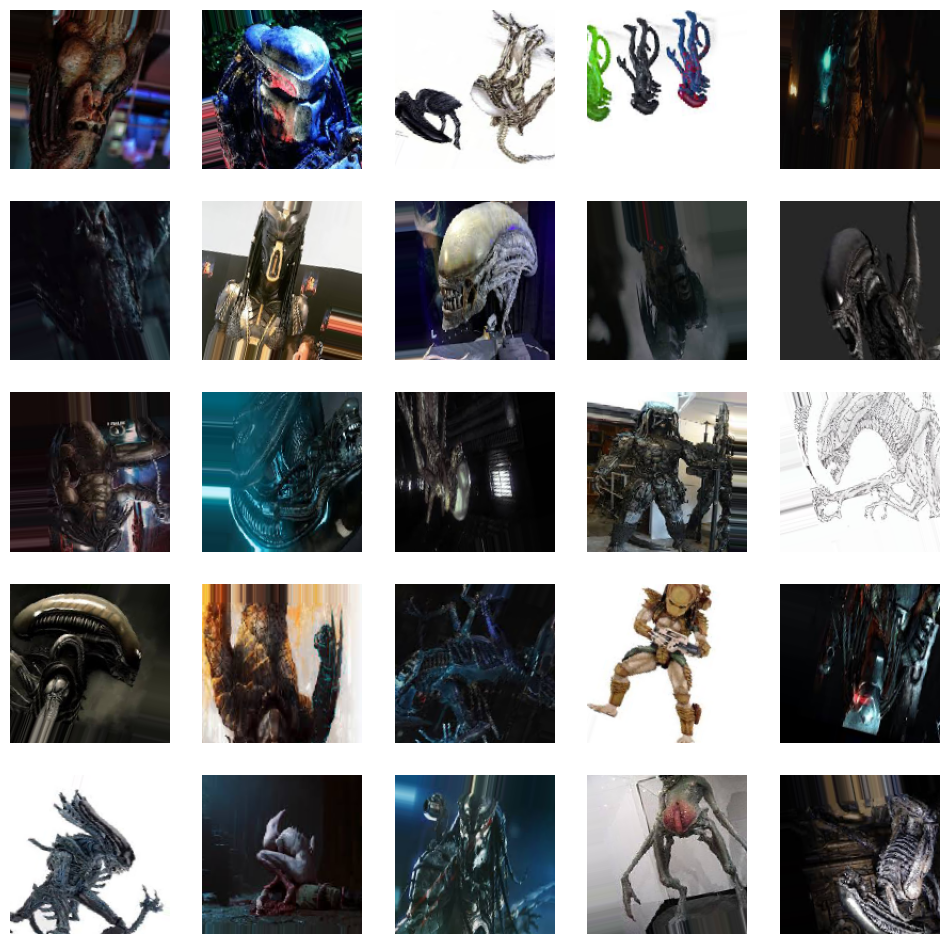

In [6]:
items = next(iter(train_generator))

plt.figure(figsize=(12,12))
for i, image in enumerate(items[0][:25], 1):
    plt.subplot(5,5,i)
    plt.imshow(image)
    plt.axis('off')

In [7]:
train_generator.class_indices

{'Alien': 0, 'Predator': 1}

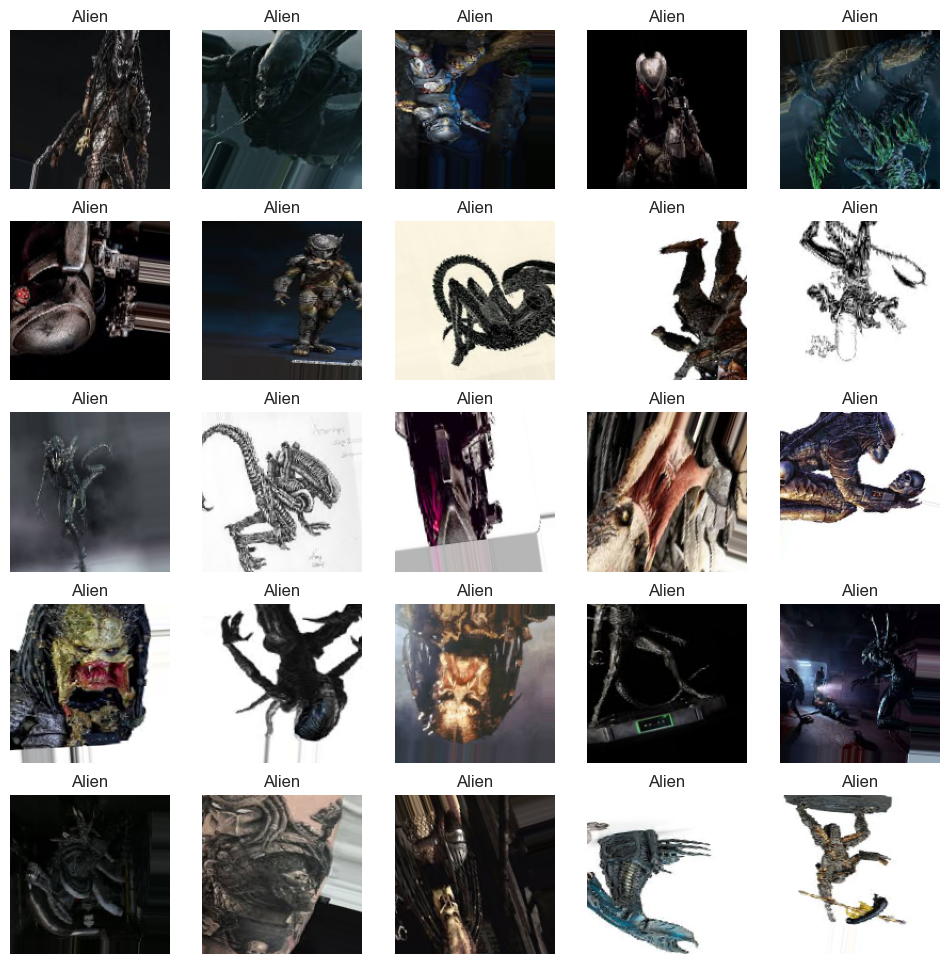

In [8]:
index2label_dict = {
    0 : 'Alien',
    1 : 'Predator',
    }

items = next(iter(train_generator))

plt.figure(figsize=(12,12))
for i, image in enumerate(items[0][:25], 1):
    label_index = np.argmax(items[1][i-1])
    label_name = index2label_dict[label_index]
    plt.subplot(5,5,i)
    plt.imshow(image)
    plt.title(label_name)
    plt.axis('off')

# check labels

In [9]:
train_generator.next()

(array([[[[0.26666668, 0.27058825, 0.45098042],
          [0.26666668, 0.27058825, 0.45098042],
          [0.26666668, 0.27058825, 0.45098042],
          ...,
          [0.95205665, 0.95242447, 0.9595233 ],
          [0.96921897, 0.96921897, 0.99882287],
          [0.6700125 , 0.6700125 , 0.706751  ]],
 
         [[0.26666668, 0.27058825, 0.45098042],
          [0.26666668, 0.27058825, 0.45098042],
          [0.26666668, 0.27058825, 0.45098042],
          ...,
          [0.98674   , 0.9866697 , 0.99570477],
          [0.8637997 , 0.8637997 , 0.90299374],
          [0.48590526, 0.48543528, 0.5302723 ]],
 
         [[0.26666668, 0.27058825, 0.45098042],
          [0.26666668, 0.27058825, 0.45098042],
          [0.26666668, 0.27058825, 0.45098042],
          ...,
          [0.94843495, 0.9470906 , 0.97386795],
          [0.6901884 , 0.68787116, 0.7377726 ],
          [0.33086604, 0.32838628, 0.3813424 ]],
 
         ...,
 
         [[0.27136898, 0.28046727, 0.43372077],
          [0.29915

In [10]:
train_generator.next()[1]

array([1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1.

In [11]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(filters=16, kernel_size=3, strides=1, activation="relu", input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=32, kernel_size=3, strides=1, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=1, activation='sigmoid')
    
])

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [14]:
train_generator

In [15]:
import tensorflow as tf

print(tf.__version__)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print("Physical GPUs: {}, Logical GPUs: {}".format(len(gpus), len(logical_gpus)))
else:
    print("CPU only")

history = model.fit(
    train_generator,
    batch_size = 494,
    epochs = 500,
    validation_data = valid_generator
)

2.10.0
Physical GPUs: 1, Logical GPUs: 1
Epoch 1/500
1/1 [==============================] - 21s 21s/step - loss: 0.6962 - accuracy: 0.5000 - val_loss: 1.3651 - val_accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 2s 2s/step - loss: 1.1733 - accuracy: 0.5000 - val_loss: 0.7556 - val_accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 3s 3s/step - loss: 0.7338 - accuracy: 0.5000 - val_loss: 0.7743 - val_accuracy: 0.5000
Epoch 4/500
1/1 [==============================] - 2s 2s/step - loss: 0.7536 - accuracy: 0.5000 - val_loss: 0.7275 - val_accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 2s 2s/step - loss: 0.7163 - accuracy: 0.5000 - val_loss: 0.7004 - val_accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 2s 2s/step - loss: 0.6964 - accuracy: 0.5000 - val_loss: 0.6875 - val_accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 3s 3s/step - loss: 0.6868 - accuracy: 0.5000 - val_loss: 0.6814 - val_accuracy

In [16]:
# history.history.keys()
# fig, ax = plt.subplots(1, 2, 1, figsize=(10, 5))
# ax.plot(history.history['loss'])
# ax.plot(history.history['val_loss'], label="validation"),
# ax.set_xlabel('Epoch')
# ax.set_ylabel('loss')
# ax.set_xlim(0, 510)
# ax.set_ylim(-0.01, 1)

# plt.subplots(1, 2, 2, figsize=(10, 5))
# ax.plot(history.history['accuracy'])
# ax.plot(history.history['val_accuracy'], label="validation"),
# ax.set_xlabel('Epoch')
# ax.set_ylabel('loss')
# ax.set_xlim(0, 510)
# ax.set_ylim(-0.01, 1)

# # plt.savefig('nn-regression-train-1.png', dpi=300, facecolor='white')
# plt.show()

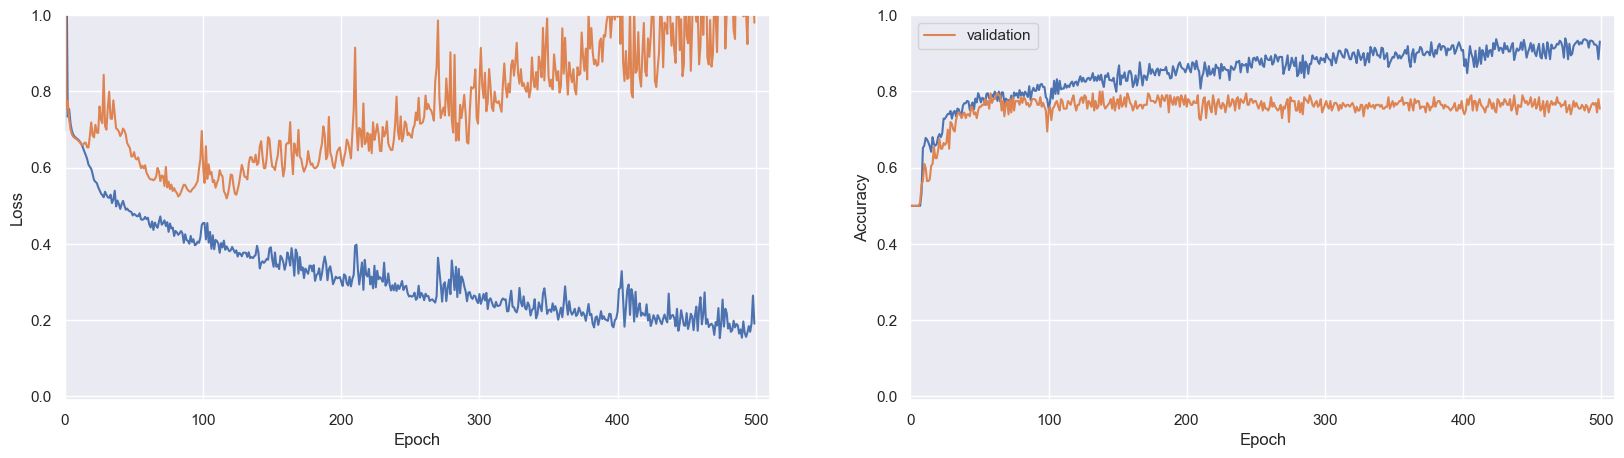

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))  # make 2 subplots

# subplot for loss
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'], label="validation")
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_xlim(0, 510)
ax[0].set_ylim(-0.01, 1)

# subplot for acc
ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'], label="validation")
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlim(0, 510)
ax[1].set_ylim(-0.01, 1)
plt.legend()
plt.show()


# Save model and data

In [18]:
model.save("model_ep2")

INFO:tensorflow:Assets written to: model_ep2\assets


INFO:tensorflow:Assets written to: model_ep2\assets


In [19]:
pwd = os.getcwd()
pwd

'C:\\Users\\redoa\\workspace\\projects\\alien_vs_predator_ep2'

In [20]:
save_files = pwd + "\\save_files"
if not os.path.exists(save_files):
    os.mkdir(save_files)

In [21]:
# transform into npy form

images, labels = next(test_generator)

In [22]:
len(labels)

200

In [23]:
np.save('save_files/images.npy', images)
np.save('save_files/labels.npy', labels)